In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_total_all = pd.read_csv('Universitas Logistik dan Bisnis Internasional (ULBI).csv')
print(df_total_all)

                      nama                                             review  \
0           PEMBERI ULASAN  kampus aneh pada masanya sebelum covid , waktu...   
1    Naufal Adilla Bestari  Tidak memanusiakan mahasiswa saat ospek contoh...   
2        Aqila Ashfa Afiza  Harusnya bisa memporsikan berbagai acara..Disi...   
3       Nadiya Nur Altavia  Aku joined this campus for 3 tahun tapi serahu...   
4            Agus Sulaeman  Saya Ortu dari salah satu siswa ULBY yg mendap...   
..                     ...                                                ...   
677           Harry Silaen                                               😍😍😍😍   
678         Alfathani Diva                                    Kampusnya keren   
679               Raini Ra                                             Mantap   
680       Tiffani Angeline  Hanya ada 11 universitas di dunia yang mencant...   
681          Irbah NabilaH  There are only 11 universities in the world wi...   

     bintang  
0          1

In [2]:
df_total_all_new = df_total_all.dropna(ignore_index=True)
print(df_total_all_new)

                      nama                                             review  \
0           PEMBERI ULASAN  kampus aneh pada masanya sebelum covid , waktu...   
1    Naufal Adilla Bestari  Tidak memanusiakan mahasiswa saat ospek contoh...   
2        Aqila Ashfa Afiza  Harusnya bisa memporsikan berbagai acara..Disi...   
3       Nadiya Nur Altavia  Aku joined this campus for 3 tahun tapi serahu...   
4            Agus Sulaeman  Saya Ortu dari salah satu siswa ULBY yg mendap...   
..                     ...                                                ...   
440           Harry Silaen                                               😍😍😍😍   
441         Alfathani Diva                                    Kampusnya keren   
442               Raini Ra                                             Mantap   
443       Tiffani Angeline  Hanya ada 11 universitas di dunia yang mencant...   
444          Irbah NabilaH  There are only 11 universities in the world wi...   

     bintang  
0          1

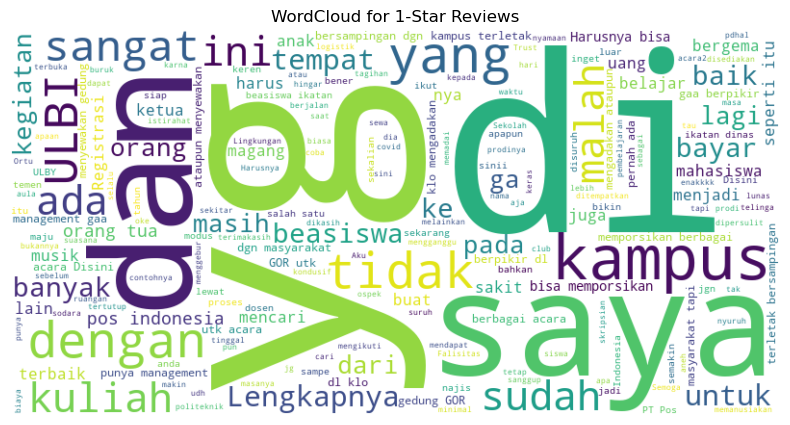

No reviews for 2-star rating.


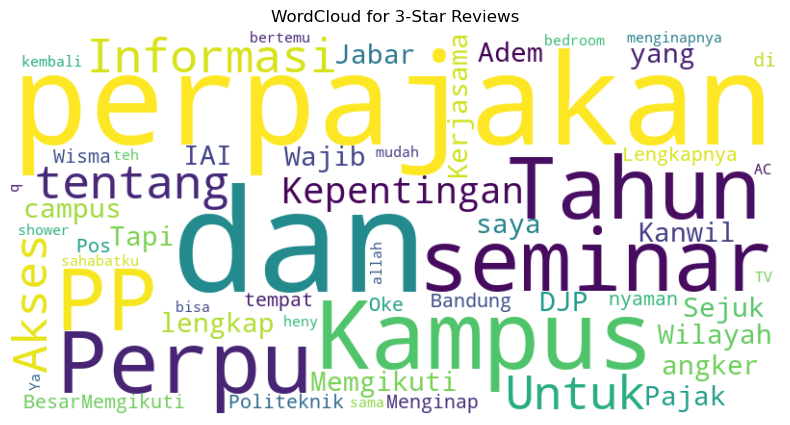

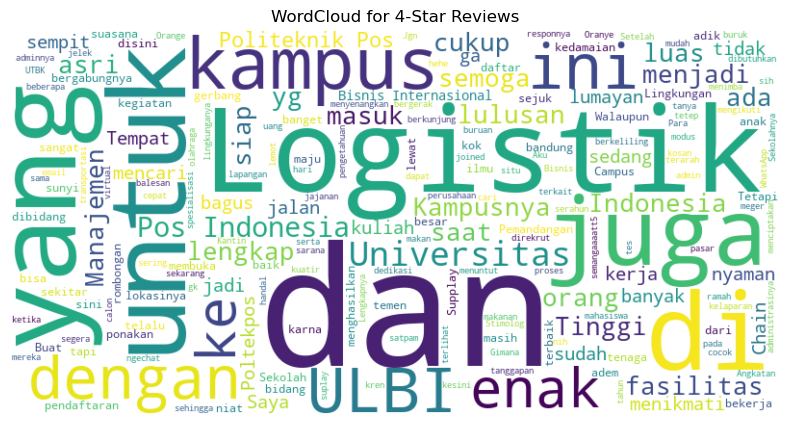

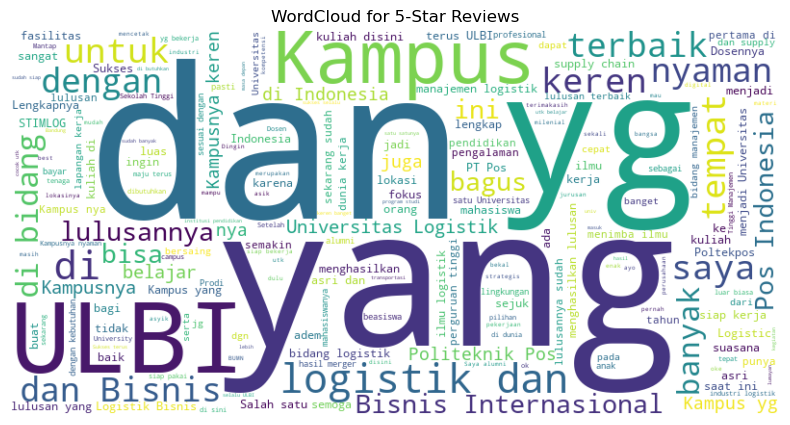

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


for bintang in range(1, 6):
    # Filter DataFrame untuk review dengan bintang tertentu
    filtered_df = df_total_all_new[df_total_all_new['bintang'] == bintang]
    
    # Gabungkan semua teks dalam satu string
    text = " ".join(review for review in filtered_df.review)
    
    if text:  # Check if there are any reviews for the current star rating
        # Buat wordcloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Tampilkan wordcloud
        plt.figure(figsize=(10, 5))
        plt.title(f'WordCloud for {bintang}-Star Reviews')
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No reviews for {bintang}-star rating.")

In [4]:
from deep_translator import GoogleTranslator
from tqdm import tqdm
import pandas as pd

translator = GoogleTranslator(source='en', target='id')

def terjemahkan(teks):
    try:
        return translator.translate(teks)
    except Exception as e:
        return str(e)

tqdm.pandas()
df_total_all_new['review'] = df_total_all_new['review'].progress_apply(terjemahkan)

df = df_total_all_new[~df_total_all_new['review'].str.contains("exception", case=False, na=False)]
df = df_total_all_new[~df_total_all_new['review'].str.contains("attribute", case=False, na=False)]

# Tampilkan DataFrame setelah terjemahan
print(df_total_all_new)


100%|██████████| 445/445 [04:31<00:00,  1.64it/s]

                      nama                                             review  \
0           PEMBERI ULASAN  kampus aneh pada masanya sebelum covid , waktu...   
1    Naufal Adilla Bestari  Tidak memanusiakan siswa saat ospek contohnya,...   
2        Aqila Ashfa Afiza  Harusnya bisa memporsikan berbagai acara..Disi...   
3       Nadiya Nur Altavia  Saya bergabung di kampus ini selama 3 tahun ta...   
4            Agus Sulaeman  Saya Ortu dari salah satu siswa ULBY yg mendap...   
..                     ...                                                ...   
440           Harry Silaen                                               None   
441         Alfathani Diva                                    Kampusnya keren   
442               Raini Ra                                             Mantap   
443       Tiffani Angeline  Hanya ada 11 universitas di dunia yang mencant...   
444          Irbah NabilaH  Hanya ada 11 universitas di dunia yang memilik...   

     bintang  
0          1


C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_38440\1466462576.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_all_new['review'] = df_total_all_new['review'].progress_apply(terjemahkan)


In [5]:
# Langkah 1: Bersihkan semua string dan ubah ke huruf kecil
df_total_all_new = df_total_all_new.progress_applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Langkah 2: Buat fungsi untuk menghapus tanda baca
def hapus_tanda_baca(teks):
    if not isinstance(teks, str):
        # Return teks as-is if it's not a string
        return teks
    tanda_baca = ".,!?():"
    for char in tanda_baca:
        teks = teks.replace(char, "")
    return teks

# Langkah 3: Aplikasikan fungsi pada kolom yang diinginkan
df_total_all_new['review'] = df_total_all_new['review'].progress_apply(hapus_tanda_baca)

# Langkah 4: Buat fungsi untuk menghitung jumlah kata
def hitung_jumlah_kata(teks):
    if isinstance(teks, str):
        return len(teks.split())
    return 0  # Return 0 for non-string values

# Terapkan jika diperlukan
df_total_all_new['word_count'] = df_total_all_new['review'].progress_apply(hitung_jumlah_kata)

# Tampilkan DataFrame setelah penghapusan tanda baca dan hitung jumlah kata
print(df_total_all_new.head())


  0%|          | 0/1335 [00:00<?, ?it/s]C:\Users\HAFIZ\anaconda3\Lib\site-packages\tqdm\std.py:805: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return getattr(df, df_function)(wrapper, **kwargs)
100%|██████████| 445/445 [00:00<00:00, 222941.39it/s]

                    nama                                             review  \
0         pemberi ulasan  kampus aneh pada masanya sebelum covid  waktu ...   
1  naufal adilla bestari  tidak memanusiakan siswa saat ospek contohnya ...   
2      aqila ashfa afiza  harusnya bisa memporsikan berbagai acaradisini...   
3     nadiya nur altavia  saya bergabung di kampus ini selama 3 tahun ta...   
4          agus sulaeman  saya ortu dari salah satu siswa ulby yg mendap...   

   bintang  word_count  
0        1         194  
1        1          28  
2        1          92  
3        1          33  
4        1         107  


In [6]:
import nltk
from nltk.tokenize import word_tokenize
import string

# Unduh data tokenizer jika belum ada
nltk.download('punkt')


# Fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

# Terapkan tokenisasi pada kolom 'text'
df_total_all_new['tokens'] = df_total_all_new['review'].astype(str).apply(tokenize_text)

print(df_total_all_new)

                      nama                                             review  \
0           pemberi ulasan  kampus aneh pada masanya sebelum covid  waktu ...   
1    naufal adilla bestari  tidak memanusiakan siswa saat ospek contohnya ...   
2        aqila ashfa afiza  harusnya bisa memporsikan berbagai acaradisini...   
3       nadiya nur altavia  saya bergabung di kampus ini selama 3 tahun ta...   
4            agus sulaeman  saya ortu dari salah satu siswa ulby yg mendap...   
..                     ...                                                ...   
440           harry silaen                                               None   
441         alfathani diva                                    kampusnya keren   
442               raini ra                                             mantap   
443       tiffani angeline  hanya ada 11 universitas di dunia yang mencant...   
444          irbah nabilah  hanya ada 11 universitas di dunia yang memilik...   

     bintang  word_count   

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HAFIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]
df_total_all_new['tokens'] = df_total_all_new['tokens'].progress_apply(remove_stopwords)

# Tampilkan DataFrame setelah penghapusan stopwords
print(df_total_all_new)

100%|██████████| 445/445 [00:00<00:00, 111277.96it/s]

                      nama                                             review  \
0           pemberi ulasan  kampus aneh pada masanya sebelum covid  waktu ...   
1    naufal adilla bestari  tidak memanusiakan siswa saat ospek contohnya ...   
2        aqila ashfa afiza  harusnya bisa memporsikan berbagai acaradisini...   
3       nadiya nur altavia  saya bergabung di kampus ini selama 3 tahun ta...   
4            agus sulaeman  saya ortu dari salah satu siswa ulby yg mendap...   
..                     ...                                                ...   
440           harry silaen                                               None   
441         alfathani diva                                    kampusnya keren   
442               raini ra                                             mantap   
443       tiffani angeline  hanya ada 11 universitas di dunia yang mencant...   
444          irbah nabilah  hanya ada 11 universitas di dunia yang memilik...   

     bintang  word_count   

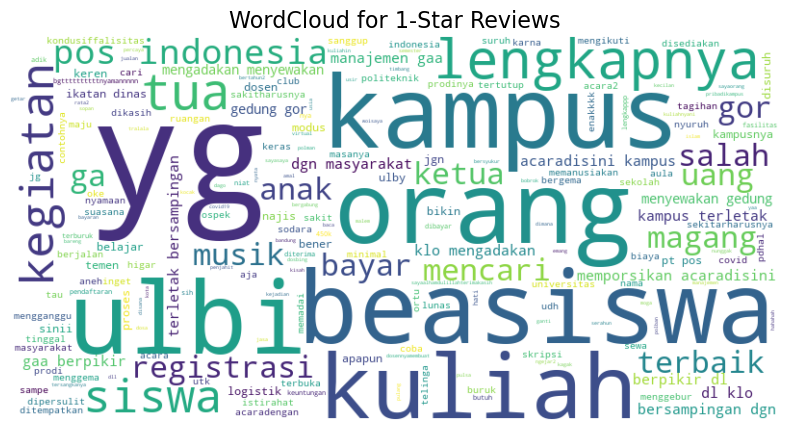

No reviews for 2-star rating.


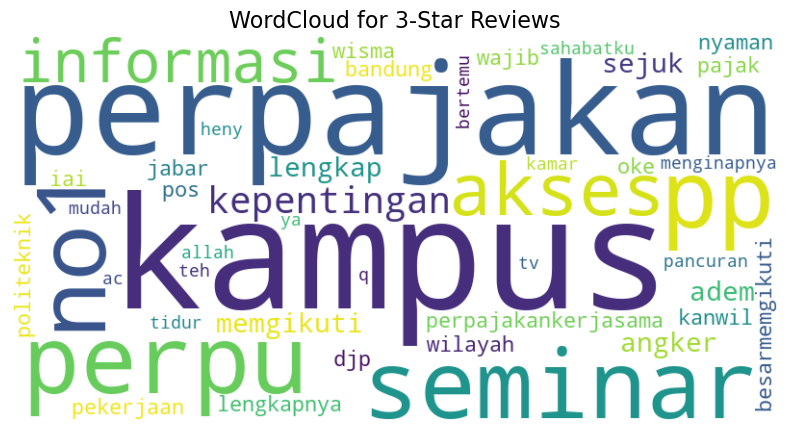

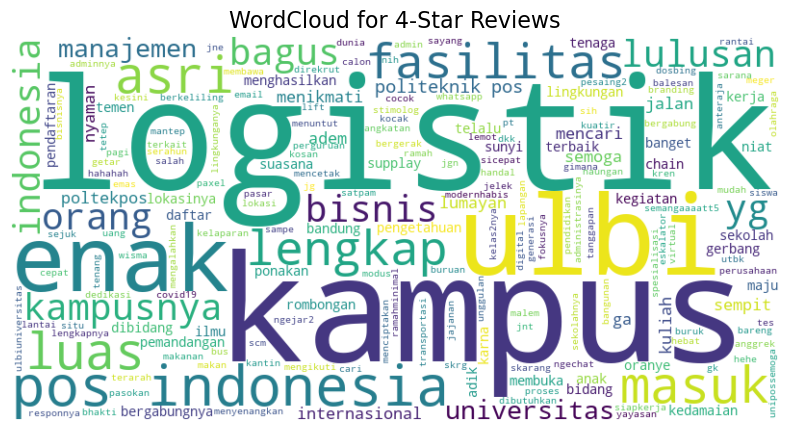

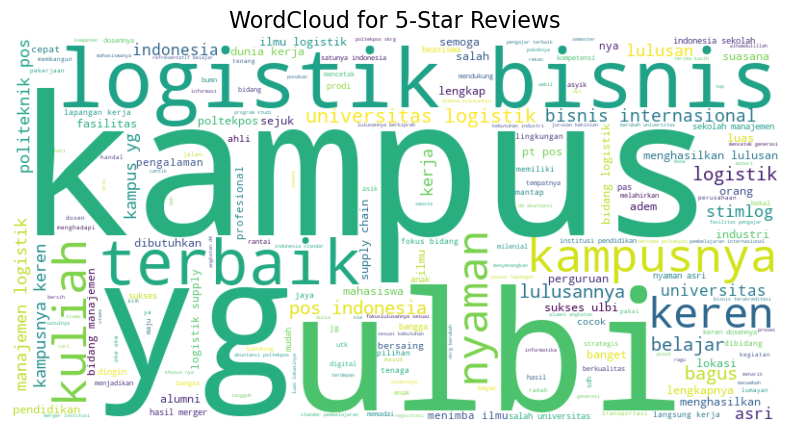

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for bintang in range(1, 6):
    # Filter DataFrame for specific star rating
    filtered_df = df_total_all_new[df_total_all_new['bintang'] == bintang]
    
    # Combine all tokenized words into a single string
    text = " ".join(" ".join(tokens) for tokens in filtered_df['tokens'] if isinstance(tokens, list))
    
    if text:  # Check if there are any tokens for the current star rating
        # Generate the WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Display the WordCloud
        plt.figure(figsize=(10, 5))
        plt.title(f'WordCloud for {bintang}-Star Reviews', fontsize=16)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No reviews for {bintang}-star rating.")


In [9]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Fungsi untuk melakukan stemming menggunakan Sastrawi
factory = StemmerFactory()
stemmer_id = factory.create_stemmer()
def apply_stemming(tokens):
    return [stemmer_id.stem(token) for token in tokens]

# Terapkan fungsi stemming pada kolom 'tokens'
df_total_all_new['stemmed_tokens'] = df_total_all_new['tokens'].progress_apply(apply_stemming)

print(df_total_all_new)

100%|██████████| 445/445 [01:25<00:00,  5.19it/s] 

                      nama                                             review  \
0           pemberi ulasan  kampus aneh pada masanya sebelum covid  waktu ...   
1    naufal adilla bestari  tidak memanusiakan siswa saat ospek contohnya ...   
2        aqila ashfa afiza  harusnya bisa memporsikan berbagai acaradisini...   
3       nadiya nur altavia  saya bergabung di kampus ini selama 3 tahun ta...   
4            agus sulaeman  saya ortu dari salah satu siswa ulby yg mendap...   
..                     ...                                                ...   
440           harry silaen                                               None   
441         alfathani diva                                    kampusnya keren   
442               raini ra                                             mantap   
443       tiffani angeline  hanya ada 11 universitas di dunia yang mencant...   
444          irbah nabilah  hanya ada 11 universitas di dunia yang memilik...   

     bintang  word_count   

In [10]:
import pandas as pd
import re


# Fungsi untuk menghapus angka
def remove_numbers(token_list):
    return [token for token in token_list if not re.search(r'\d', token)]  # Hapus token yang mengandung angka

# Terapkan fungsi ke setiap baris
df_total_all_new['stemmed_tokens2'] = df_total_all_new['stemmed_tokens'].apply(remove_numbers)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens2']:
    print(','.join(tokens))


kampus,aneh,masa,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,udh,magang,suruh,ketua,prodinya,kasih,sodara,nyuruh,cari,magang,najis,bener,ketua,prodi,kampus,tau,sampe,ganti,nama,ulbi,bener,bobrok,moga,aja,dosen,sangka,baca,inget,dosa,orang,tua,sayaorang,tua,kota,bandung,usir,suruh,pulang,usia,orang,tua,tua,dosen,sopan,kagak,woisaya,nunggak,bayar,apa,uang,gedung,lunas,semester,lunas,sulit,najis,tralala,emang,inget,islam,percaya,mana,timbang,amal,buruk,jadi,nama,dosennyamembuat,orang,tua,kuliahin,anak,polman,dago,polban,dll,kuliah,sana,ga,sulit,kuliahnyani,kisah,nyata,pribadikampus,aneh,masa,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,udh,magang,suruh,ketua,prodinya,kasih,sodara,nyuruh,cari,magang,najis,bener,ketua,prodi,kampus,lengkap
manusia,siswa,ospek,contoh,yg,sakit,suruh,istirahat,giat,pdhal,kampus,coba
porsi,acaradisini,kampus,letak,samping,dgn,masyarakat,yg,manajemen,gaa,pikir,dl,klo,ada,sewa,gedung,gor,utk,acaradengan,musik,yg,gema,keras,menggebur,bikin,telinga,

In [11]:
# Menghitung token kosong setelah stemming
def count_empty_tokens(df):
    # Hitung jumlah token kosong dalam setiap baris dan jumlah totalnya
    df['empty_token_count'] = df['stemmed_tokens'].apply(lambda tokens: sum(1 for token in tokens if not token.strip()))
    total_empty_tokens = df['empty_token_count'].sum()
    print(f"Total Token Kosong: {total_empty_tokens}")
    return total_empty_tokens

# Panggil fungsi untuk menghitung token kosong
count_empty_tokens(df_total_all_new)


Total Token Kosong: 85


85

In [12]:
# Bersihkan token kosong langsung dari kolom 'stemmed_tokens'
df_total_all_new['stemmed_tokens'] = df_total_all_new['stemmed_tokens'].apply(
    lambda tokens: [token for token in tokens if token.strip()]
)

# Konfirmasi token kosong sudah dihapus
count_empty_tokens(df_total_all_new)


Total Token Kosong: 0


0

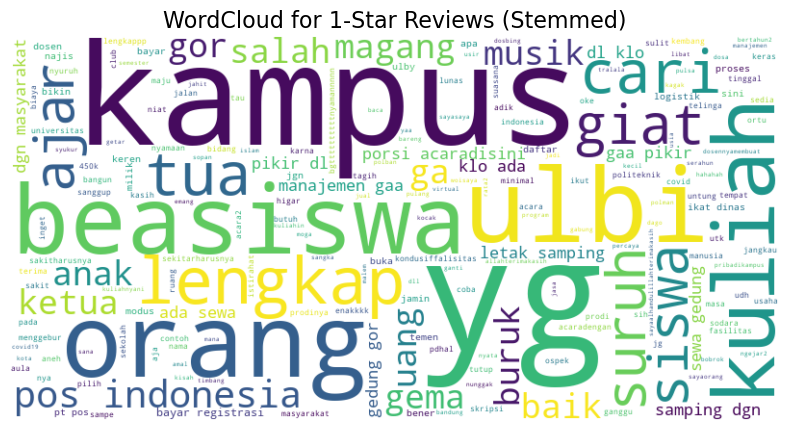

No reviews for 2-star rating.


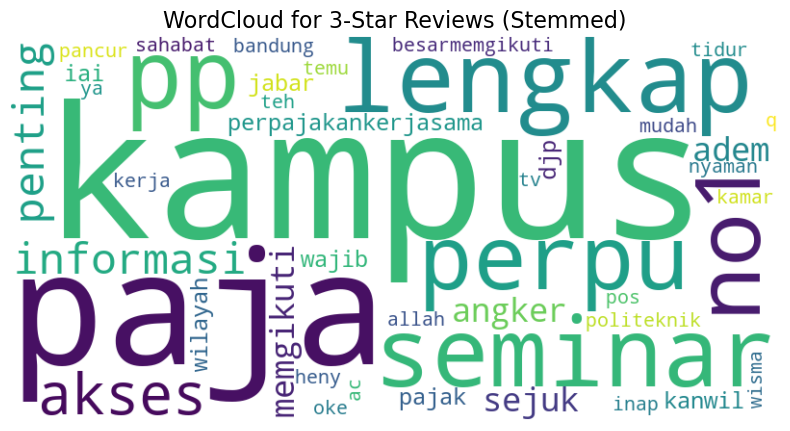

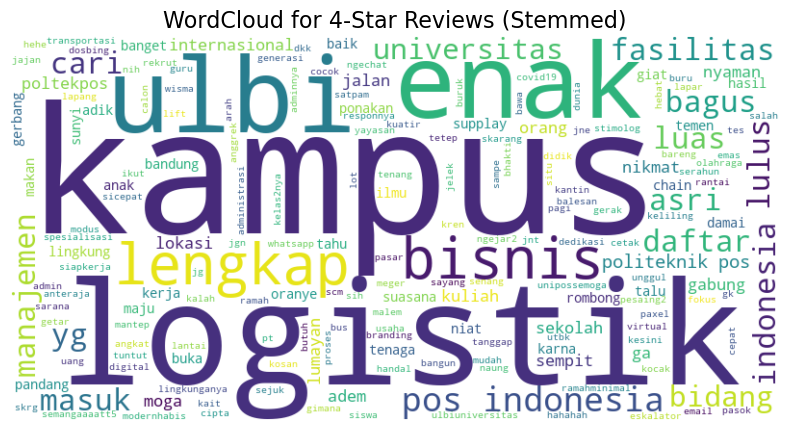

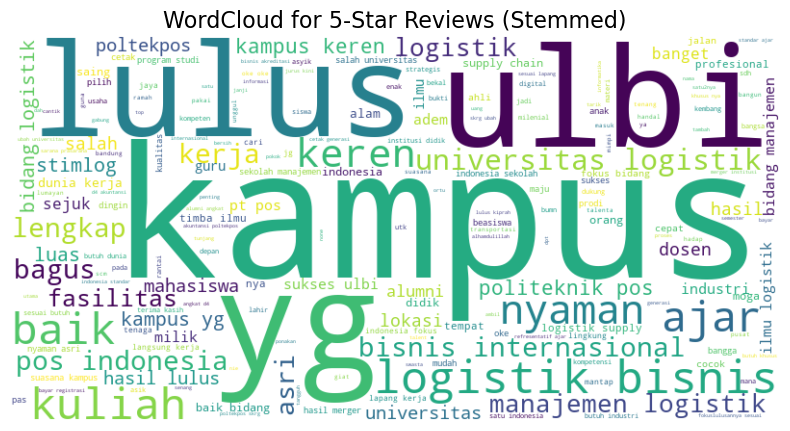

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for bintang in range(1, 6):
    # Filter DataFrame for specific star rating
    filtered_df = df_total_all_new[df_total_all_new['bintang'] == bintang]
    
    # Combine all stemmed tokens into a single string
    text = " ".join(" ".join(tokens) for tokens in filtered_df['stemmed_tokens'] if isinstance(tokens, list))
    
    if text:  # Check if there are any tokens for the current star rating
        # Generate the WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
        
        # Display the WordCloud
        plt.figure(figsize=(10, 5))
        plt.title(f'WordCloud for {bintang}-Star Reviews (Stemmed)', fontsize=16)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No reviews for {bintang}-star rating.")


In [14]:
import pandas as pd
import ast  # Untuk mengubah string menjadi list

# Membaca kembali file Excel
df_total_all_new = pd.read_excel("ULBI_Cleaned.xlsx")

# Konversi kembali kolom 'stemmed_tokens2' dari string ke list tokenized
df_total_all_new['stemmed_tokens2'] = df_total_all_new['stemmed_tokens2'].apply(ast.literal_eval)

# Cek apakah sudah berbentuk list
print(type(df_total_all_new['stemmed_tokens2'][0]))  # Harusnya <class 'list'>



<class 'list'>


In [15]:
import pandas as pd
import requests
import tqdm
import io

# 1. **Ambil dan Muat Kamus Alay**
url_kamus_alay = "https://raw.githubusercontent.com/nadyndyaa/Kamus-Alay/refs/heads/main/Kamus%20Alay.csv"
response = requests.get(url_kamus_alay)

# Simpan ke DataFrame
kamus_alay = pd.read_csv(io.StringIO(response.text), encoding='latin-1')

# Ubah ke Dictionary {alay: baik}
kamus_alay_dict = dict(zip(kamus_alay['Alay'], kamus_alay['Baik']))

# 2. **Fungsi Normalisasi**
def normalisasi_kata(token_list):
    """Ganti kata yang ada di kamus alay dengan kata normal"""
    if isinstance(token_list, list):  # Pastikan input berbentuk list
        return [kamus_alay_dict.get(word, word) for word in token_list]  # Cek di kamus, jika tidak ada tetap pakai kata asli
    return token_list  # Jika bukan list, kembalikan seperti semula

# 3. **Terapkan ke DataFrame**
tqdm.tqdm.pandas()
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens2'].progress_apply(normalisasi_kata)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))



100%|██████████| 445/445 [00:00<00:00, 139600.99it/s]

kampus,aneh,masa,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,udh,magang,suruh,ketua,prodi,kasih,sodara,nyuruh,cari,magang,najis,bener,ketua,prodi,kampus,tau,sampe,ganti,nama,ulbi,bener,bobrok,moga,aja,dosen,sangka,baca,inget,dosa,orang,tua,sayaorang,tua,kota,bandung,usir,suruh,pulang,usia,orang,tua,tua,dosen,sopan,kagak,woi,saya,nunggak,bayar,apa,uang,gedung,lunas,semester,lunas,sulit,najis,emang,inget,islam,percaya,mana,timbang,amal,buruk,jadi,nama,dosen,membuat,orang,tua,kuliahin,anak,polman,dago,polban,dll,kuliah,sana,ga,sulit,kuliah,kisah,nyata,pribadi,kampus,aneh,masa,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,udh,magang,suruh,ketua,prodi,kasih,sodara,nyuruh,cari,magang,najis,bener,ketua,prodi,kampus,lengkap
manusia,siswa,ospek,contoh,yg,sakit,suruh,istirahat,giat,pdhal,kampus,coba
porsi,acara,disini,kampus,letak,samping,dgn,masyarakat,yg,manajemen,gaa,pikir,dl,klo,ada,sewa,gedung,gor,utk,acara,dengan,musik,yg,gema,keras,menggebur,bikin,telinga,sakit,harusnya,kl

In [16]:
import pandas as pd
import requests
import tqdm
import io

# 1. **Ambil dan Muat Kamus Alay**
url_kamus_alay = "https://raw.githubusercontent.com/Aiji3107/kamus_alay/refs/heads/main/kamus_alay.csv"
response = requests.get(url_kamus_alay)

# Simpan ke DataFrame
kamus_alay = pd.read_csv(io.StringIO(response.text), encoding='latin-1')

# Ubah ke Dictionary {alay: baik}
kamus_alay_dict = dict(zip(kamus_alay['slang'], kamus_alay['formal']))

# 2. **Fungsi Normalisasi**
def normalisasi_kata(token_list):
    """Ganti kata yang ada di kamus alay dengan kata normal"""
    if isinstance(token_list, list):  # Pastikan input berbentuk list
        return [kamus_alay_dict.get(word, word) for word in token_list]  # Cek di kamus, jika tidak ada tetap pakai kata asli
    return token_list  # Jika bukan list, kembalikan seperti semula

# 3. **Terapkan ke DataFrame**
tqdm.tqdm.pandas()
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(normalisasi_kata)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


100%|██████████| 445/445 [00:00<00:00, 335815.99it/s]

kampus,aneh,masa,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,sudah,magang,suruh,ketua,prodi,kasih,sodara,nyuruh,cari,magang,najis,benar,ketua,prodi,kampus,tau,sampai,ganti,nama,ulbi,benar,bobrok,moga,saja,dosen,sangka,baca,ingat,dosa,orang,tua,sayaorang,tua,kota,bandung,usir,suruh,pulang,usia,orang,tua,tua,dosen,sopan,kagak,woi,saya,nunggak,bayar,apa,uang,gedung,lunas,semester,lunas,sulit,najis,memang,ingat,islam,percaya,mana,timbang,amal,buruk,jadi,nama,dosen,membuat,orang,tua,kuliahin,anak,polman,dago,polban,dll,kuliah,sana,enggak,sulit,kuliah,kisah,nyata,pribadi,kampus,aneh,masa,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,sudah,magang,suruh,ketua,prodi,kasih,sodara,nyuruh,cari,magang,najis,benar,ketua,prodi,kampus,lengkap
manusia,siswa,ospek,contoh,yang,sakit,suruh,istirahat,giat,padahal,kampus,coba
porsi,acara,disini,kampus,letak,samping,dengan,masyarakat,yang,manajemen,enggak,pikir,dulu,kalau,ada,sewa,gedung,gor,untuk,acara,dengan,musik,yang,gema,keras,menggebur,

In [17]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(remove_stopwords)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Fungsi untuk melakukan stemming menggunakan Sastrawi
factory = StemmerFactory()
stemmer_id = factory.create_stemmer()
def apply_stemming(tokens):
    return [stemmer_id.stem(token) for token in tokens]

# Terapkan fungsi stemming pada kolom 'tokens'
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(apply_stemming)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


100%|██████████| 445/445 [00:00<00:00, 198813.94it/s]


kampus,aneh,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,magang,suruh,ketua,prodi,kasih,sodara,nyuruh,cari,magang,najis,ketua,prodi,kampus,tau,ganti,nama,ulbi,bobrok,moga,dosen,sangka,baca,dosa,orang,tua,sayaorang,tua,kota,bandung,usir,suruh,pulang,usia,orang,tua,tua,dosen,sopan,kagak,woi,nunggak,bayar,uang,gedung,lunas,semester,lunas,sulit,najis,islam,percaya,timbang,amal,buruk,nama,dosen,orang,tua,kuliahin,anak,polman,dago,polban,dll,kuliah,sulit,kuliah,kisah,nyata,pribadi,kampus,aneh,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,magang,suruh,ketua,prodi,kasih,sodara,nyuruh,cari,magang,najis,ketua,prodi,kampus,lengkap
manusia,siswa,ospek,contoh,sakit,suruh,istirahat,giat,kampus,coba
porsi,acara,kampus,letak,samping,masyarakat,manajemen,pikir,sewa,gedung,gor,acara,musik,gema,keras,menggebur,bikin,telinga,sakit,musik,gor,sanggup,sewa,club,minimal,aula,ruang,buka,gor,tutup,gema,ganggu,masyarakat,porsi,acara,kampus,letak,samping,masyarakat,manajemen,pikir,sewa,gedung,gor,a

100%|██████████| 445/445 [00:33<00:00, 13.25it/s] 

kampus,aneh,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,magang,suruh,ketua,prodi,kasih,sodara,nyuruh,cari,magang,najis,ketua,prodi,kampus,tau,ganti,nama,ulbi,bobrok,moga,dosen,sangka,baca,dosa,orang,tua,sayaorang,tua,kota,bandung,usir,suruh,pulang,usia,orang,tua,tua,dosen,sopan,kagak,woi,nunggak,bayar,uang,gedung,lunas,semester,lunas,sulit,najis,islam,percaya,timbang,amal,buruk,nama,dosen,orang,tua,kuliahin,anak,polman,dago,polban,dll,kuliah,sulit,kuliah,kisah,nyata,pribadi,kampus,aneh,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,magang,suruh,ketua,prodi,kasih,sodara,nyuruh,cari,magang,najis,ketua,prodi,kampus,lengkap
manusia,siswa,ospek,contoh,sakit,suruh,istirahat,giat,kampus,coba
porsi,acara,kampus,letak,samping,masyarakat,manajemen,pikir,sewa,gedung,gor,acara,musik,gema,keras,menggebur,bikin,telinga,sakit,musik,gor,sanggup,sewa,club,minimal,aula,ruang,buka,gor,tutup,gema,ganggu,masyarakat,porsi,acara,kampus,letak,samping,masyarakat,manajemen,pikir,sewa,gedung,gor,a

In [18]:
# Menghitung token kosong setelah stemming
def count_empty_tokens(df):
    # Hitung jumlah token kosong dalam setiap baris dan jumlah totalnya
    df['empty_token_count'] = df['stemmed_tokens4'].apply(lambda tokens: sum(1 for token in tokens if not token.strip()))
    total_empty_tokens = df['empty_token_count'].sum()
    print(f"Total Token Kosong: {total_empty_tokens}")
    return total_empty_tokens

# Panggil fungsi untuk menghitung token kosong
count_empty_tokens(df_total_all_new)


# Bersihkan token kosong langsung dari kolom 'stemmed_tokens'
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda tokens: [token for token in tokens if token.strip()]
)

# Konfirmasi token kosong sudah dihapus
count_empty_tokens(df_total_all_new)


Total Token Kosong: 59
Total Token Kosong: 0


0

In [19]:
import ast
import pandas as pd

# Kata-kata yang ingin dihapus
stopwords = {'none', 'nya', 'moga', 'oke', 'ya', 'isi', 'ok', 'jos', 'gaes', 'via','nih'}

# Fungsi untuk menghitung jumlah token kosong atau yang termasuk stopwords
def count_empty_tokens(df):
    empty_tokens = df['stemmed_tokens4'].apply(lambda tokens: sum(1 for token in tokens if not token.strip() or token.lower() in stopwords))
    total_empty_tokens = empty_tokens.sum()
    print(f"Total empty or stopword tokens: {total_empty_tokens}")

# Pastikan kolom 'stemmed_tokens4' berisi list, bukan string yang terlihat seperti list
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Bersihkan token kosong dan kata-kata yang ada dalam stopwords
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda tokens: [token for token in tokens if token.strip() and token.lower() not in stopwords]
)

# Konfirmasi bahwa token yang tidak diinginkan sudah dihapus
count_empty_tokens(df_total_all_new)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


Total empty or stopword tokens: 0
kampus,aneh,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,magang,suruh,ketua,prodi,kasih,sodara,nyuruh,cari,magang,najis,ketua,prodi,kampus,tau,ganti,nama,ulbi,bobrok,dosen,sangka,baca,dosa,orang,tua,sayaorang,tua,kota,bandung,usir,suruh,pulang,usia,orang,tua,tua,dosen,sopan,kagak,woi,nunggak,bayar,uang,gedung,lunas,semester,lunas,sulit,najis,islam,percaya,timbang,amal,buruk,nama,dosen,orang,tua,kuliahin,anak,polman,dago,polban,dll,kuliah,sulit,kuliah,kisah,nyata,pribadi,kampus,aneh,covid,politeknik,pos,indonesia,orang,tinggal,skripsi,magang,suruh,ketua,prodi,kasih,sodara,nyuruh,cari,magang,najis,ketua,prodi,kampus,lengkap
manusia,siswa,ospek,contoh,sakit,suruh,istirahat,giat,kampus,coba
porsi,acara,kampus,letak,samping,masyarakat,manajemen,pikir,sewa,gedung,gor,acara,musik,gema,keras,menggebur,bikin,telinga,sakit,musik,gor,sanggup,sewa,club,minimal,aula,ruang,buka,gor,tutup,gema,ganggu,masyarakat,porsi,acara,kampus,letak,samping,masyarakat,mana

In [20]:
import gensim
from gensim import corpora

# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens4'].progress_apply(lambda x: x))
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens4']]

# Langkah 8: Latih model LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Tampilkan topik-topik
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

100%|██████████| 445/445 [00:00<00:00, 445669.84it/s]


Topic: 0 
Words: 0.046*"kampus" + 0.017*"indonesia" + 0.013*"pos" + 0.013*"acara" + 0.013*"gor" + 0.013*"lokasi" + 0.013*"adem" + 0.012*"cari" + 0.010*"sewa" + 0.010*"masyarakat"
Topic: 1 
Words: 0.064*"kampus" + 0.053*"logistik" + 0.046*"ajar" + 0.032*"bagus" + 0.024*"nyaman" + 0.023*"lengkap" + 0.021*"bidang" + 0.020*"keren" + 0.019*"fasilitas" + 0.017*"manajemen"
Topic: 2 
Words: 0.083*"kampus" + 0.046*"lulus" + 0.045*"ulbi" + 0.039*"keren" + 0.038*"kerja" + 0.021*"hasil" + 0.020*"nyaman" + 0.019*"logistik" + 0.017*"banget" + 0.016*"sukses"
Topic: 3 
Words: 0.065*"logistik" + 0.057*"bisnis" + 0.034*"universitas" + 0.029*"kuliah" + 0.024*"ilmu" + 0.023*"poltekpos" + 0.022*"internasional" + 0.021*"ulbi" + 0.020*"salah" + 0.011*"milik"
Topic: 4 
Words: 0.062*"indonesia" + 0.062*"logistik" + 0.040*"pos" + 0.036*"universitas" + 0.024*"politeknik" + 0.023*"lulus" + 0.021*"bidang" + 0.020*"ulbi" + 0.020*"hasil" + 0.019*"kampus"


In [21]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from tqdm import tqdm
import pandas as pd

def compute_coherence_values(dictionary, corpus, texts, topic_range, passes_range):
    results = []
    best_coherence = 0
    best_model = None
    best_params = {}
    
    for num_topics in tqdm(topic_range, desc="Computing coherence for topics"):
        for passes in tqdm(passes_range, desc=f"Testing {num_topics} topics", leave=False):
            # Membuat model LDA dengan jumlah topik dan passes yang berbeda
            lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=passes, random_state=100)
            
            # Menghitung nilai koherensi
            coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_score = coherence_model.get_coherence()
            
            # Simpan hasil
            results.append({'num_topics': num_topics, 'passes': passes, 'coherence': coherence_score})
            
            # Cek apakah nilai koherensi saat ini adalah yang terbaik
            if coherence_score > best_coherence:
                best_coherence = coherence_score
                best_model = lda_model
                best_params = {'num_topics': num_topics, 'passes': passes}
    
    # Konversi hasil ke DataFrame untuk analisis lebih lanjut
    results_df = pd.DataFrame(results)
    
    print(f"\n✅ Nilai koherensi optimal: {best_coherence:.4f}")
    print(f"📊 Parameter terbaik: {best_params}")

    return results_df, best_model, best_params

# 🔥 Jalankan fungsi dengan rentang topik dan passes yang diinginkan
topic_range = range(1, 11)  # Dari 1 hingga 10 topik
passes_range = range(15, 91, 15)  # Dari 15 hingga 90 dengan kelipatan 15

results_df, best_lda_model, best_params = compute_coherence_values(dictionary=dictionary, 
                                                                   corpus=corpus, 
                                                                   texts=df_total_all_new['stemmed_tokens4'], 
                                                                   topic_range=topic_range, 
                                                                   passes_range=passes_range)


Computing coherence for topics: 100%|██████████| 10/10 [15:11<00:00, 91.11s/it]


✅ Nilai koherensi optimal: 0.4918
📊 Parameter terbaik: {'num_topics': 3, 'passes': 30}


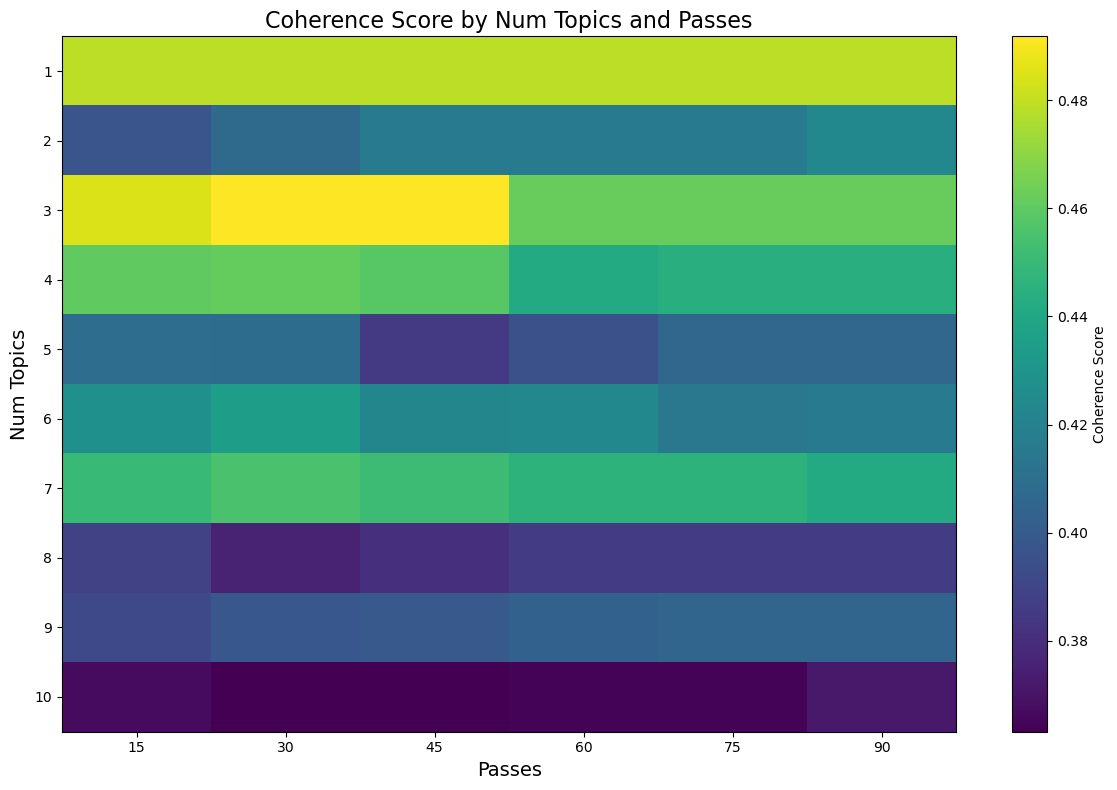

In [22]:
import matplotlib.pyplot as plt

# Visualisasi nilai koherensi dengan sumbu x dan y yang sesuai
pivot_table = results_df.pivot(index='num_topics', columns='passes', values='coherence')

# Membuat heatmap dengan label yang sesuai
plt.figure(figsize=(12, 8))
plt.title("Coherence Score by Num Topics and Passes", fontsize=16)
plt.xlabel("Passes", fontsize=14)
plt.ylabel("Num Topics", fontsize=14)

# Menentukan label sumbu x dan y dengan nilai yang sesuai
plt.xticks(ticks=range(len(pivot_table.columns)), labels=pivot_table.columns)
plt.yticks(ticks=range(len(pivot_table.index)), labels=pivot_table.index)

# Menampilkan heatmap
plt.imshow(pivot_table, cmap='viridis', aspect='auto')
plt.colorbar(label='Coherence Score')
plt.tight_layout()
plt.show()


In [26]:
# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens4'].progress_apply(lambda x: x))
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens4']]

# Langkah 8: Latih model LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=30)

# Tampilkan topik-topik
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

100%|██████████| 445/445 [00:00<00:00, 445669.84it/s]


Topic: 0 
Words: 0.072*"kampus" + 0.032*"nyaman" + 0.025*"asri" + 0.022*"lengkap" + 0.021*"kuliah" + 0.020*"ajar" + 0.014*"banget" + 0.013*"beasiswa" + 0.013*"luas" + 0.013*"fasilitas"
Topic: 1 
Words: 0.052*"indonesia" + 0.047*"universitas" + 0.045*"logistik" + 0.039*"ulbi" + 0.034*"pos" + 0.020*"bisnis" + 0.020*"politeknik" + 0.018*"kampus" + 0.017*"lulus" + 0.015*"internasional"
Topic: 2 
Words: 0.067*"logistik" + 0.053*"kampus" + 0.037*"keren" + 0.034*"lulus" + 0.026*"ulbi" + 0.024*"bidang" + 0.024*"bisnis" + 0.023*"kerja" + 0.020*"ajar" + 0.019*"ilmu"


In [30]:
import os
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel

# Pastikan semua elemen dalam kolom 'stemmed_tokens4' adalah list
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(lambda x: x if isinstance(x, list) else [])

# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens4'])
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens4']]

# Langkah 8: Latih model LDA
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=30)

# Mengambil topik-topik dan menyimpannya dalam format yang dapat diekspor
topics = []
for idx, topic in lda_model.print_topics(-1):
    words = topic.split(' + ')
    topic_dict = {'Topic': idx}
    for i, word in enumerate(words):
        weight, term = word.split('*"')
        term = term.replace('"', '')
        topic_dict[f'Word_{i+1}'] = f'{term} ({weight})'
    topics.append(topic_dict)

# Konversi ke DataFrame
df_topics = pd.DataFrame(topics)

# Simpan ke file Excel dengan sheet baru
file_path = 'Seluruh_Univ_lda_topics2.xlsx'
sheet_name = 'ULBI_Univ_lda_topics'  # Nama sheet baru yang diinginkan

# Cek apakah file sudah ada
file_exists = os.path.exists(file_path)

if file_exists:
    # Jika file sudah ada, gunakan mode append dengan if_sheet_exists="replace"
    with pd.ExcelWriter(file_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
        df_topics.to_excel(writer, sheet_name=sheet_name, index=False)
else:
    # Jika file belum ada, buat file baru tanpa if_sheet_exists
    with pd.ExcelWriter(file_path, mode="w", engine="openpyxl") as writer:
        df_topics.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Topik telah disimpan dalam sheet '{sheet_name}' pada file '{file_path}'")


Topik telah disimpan dalam sheet 'ULBI_Univ_lda_topics' pada file 'Seluruh_Univ_lda_topics2.xlsx'
